In [3]:
import numpy as np

Simpson's rule is a way of subtracting the errors from the midpoint and trapezoidal rules to create a composite estimate of integration which has a minimal error. We can imagine a variable Is , where: 
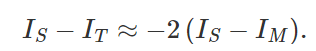

Arranging for an expression of Is:

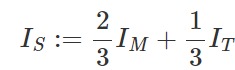

Substituting in what we know from the rectangle and trapezoid rules:

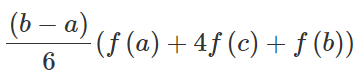

If we assumed that the interval [a,b] has been split up into n intervals or n+1 datapoint, the function can be written in the following form:

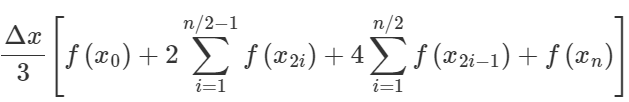

This can be interpreted as the initial value plus double the even values of the function plus quadruple the odd values of the function plus the final value
all multiplied by the interval size / 3 

In [4]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    assert number_intervals % 2 == 0 #the implementatin requires that the number of subintervals is not even
    interval_size = (b-a)/number_intervals 
    I_cS2 = function(a) + function(b) # the first and last values of the function, i.e. f(x0) + f(xn) components of the equation
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i*interval_size) # the odd components i.e. 4sigf(x2i-1)
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a+i*interval_size) # the even components i.e. 2sigf(x2i)
        
    return I_cS2 * (interval_size/3.0)
    

In [5]:
print("The area found by direct integration = 2")
for i in (2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, np.sin, i)
    print("Area %g rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The area found by direct integration = 2
Area 2 rectangle(s) = 2.0944 (error=0.0943951)
Area 10 rectangle(s) = 2.00011 (error=0.000109517)
Area 100 rectangle(s) = 2 (error=1.08245e-08)
Area 1000 rectangle(s) = 2 (error=1.07869e-12)
